In [30]:
%matplotlib inline
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import urllib.request

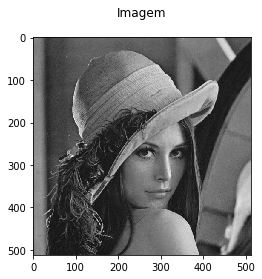

In [34]:
import cv2

url='http://i.imgur.com/8vuLtqi.png'
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap=plt.cm.gray)
plt.title('Imagem\n');

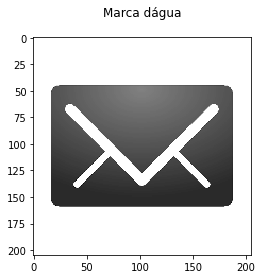

In [35]:
url2='https://cdn1.iconfinder.com/data/icons/fs-icons-ubuntu-by-franksouza-light/512/indicator-messages-new.png'
url_response2 = urllib.request.urlopen(url2)
img_array2 = np.array(bytearray(url_response2.read()), dtype=np.uint8)
img2 = cv2.imdecode(img_array2, cv2.IMREAD_GRAYSCALE)
res = cv2.resize(img2,None,fx=0.4, fy=0.4, interpolation = cv2.INTER_CUBIC)

plt.imshow(res, cmap=plt.cm.gray)
plt.title('Marca dágua\n');

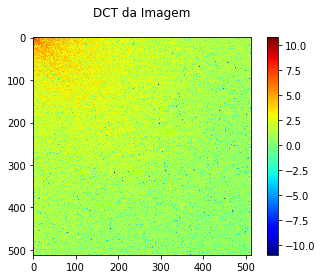

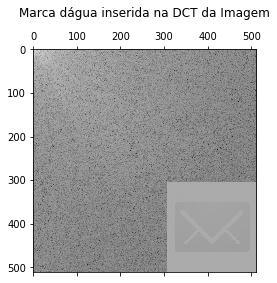

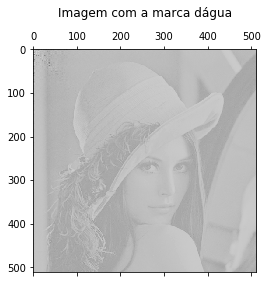

In [76]:
dct = fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')
dct_img = np.log(np.abs(dct))

fig, ax = plt.subplots()
cax = ax.imshow(dct_img, cmap=plt.cm.jet)
cbar = fig.colorbar(cax)


plt.title('DCT da Imagem\n');

[l1, c1] = img.shape
[l2, c2] = res.shape
[l3, c3] = dct.shape

initial_l = l3 - l2
initial_c = c3 - c2

constante = 0.2

result = dct
result[initial_l:,initial_c:] = (1-constante)*dct[initial_l:,initial_c:] + constante*res


plt.matshow(np.log(np.abs(result)),cmap=plt.cm.gray);
plt.title('Marca dágua inserida na DCT da Imagem\n');

marcadagua = fftpack.idct(fftpack.idct(result.T, norm='ortho').T, norm='ortho')
plt.matshow(np.log(np.abs(marcadagua)),cmap=plt.cm.gray);
plt.title('Imagem com a marca dágua\n');